# Sheet 5
## Exercise 1: Estimators

In [2]:
import numpy as np
import scipy as sc
import math

# (a)
experiments = np.linspace(1,10000,10000)
heights1 = np.array([np.random.normal(170, 10, 10) for i in experiments])

# (b)
# mean for uniform distribution is (a+b)/2, standard deviation is (1/sqrt(12))*(b-a)
# we can solve this system of linear equations by hand or, just for fun, like this:

f = np.array([[0.5, 0.5], [(-1/math.sqrt(12)), (1/math.sqrt(12))]])
g = np.array([170, 10])
solution = np.linalg.solve(f,g)

a = solution[0]
b = solution[1]

heights2 = np.array([np.random.uniform(a, b, 10) for i in experiments])

In [3]:
arithmeans1 = np.array([np.mean(heights1[i,]) for i in range(0,10000)])
medians1 = np.array([np.median(heights1[i,]) for i in range(0,10000)])
geomeans1 = np.array([sc.stats.gmean(heights1[i,]) for i in range(0,10000)])
modes1 = np.transpose(np.array([sc.stats.mode(heights1[i,]) for i in range(0,10000)]))[0]

In [4]:
arithmeans2 = np.array([np.mean(heights2[i,]) for i in range(0,10000)])
medians2 = np.array([np.median(heights2[i,]) for i in range(0,10000)])
geomeans2 = np.array([sc.stats.gmean(heights2[i,]) for i in range(0,10000)])
modes2 = np.transpose(np.array([sc.stats.mode(heights2[i,]) for i in range(0,10000)]))[0]

In [5]:
# minimum variance bounds:
MVBgauss = 10**2/10

In [6]:
print('arithmetic mean: \n')
print('bias (gauss): ', np.mean(arithmeans1) - 170)
print('efficiency (gauss): ', MVBgauss/np.var(arithmeans1))
print('bias (uniform): ', np.mean(arithmeans2) -170)
print('efficiency (uniform): ', MVBgauss/np.var(arithmeans2))

arithmetic mean: 

bias (gauss):  -0.03026658030447038
efficiency (gauss):  0.9980116004456473
bias (uniform):  -0.01515859037326095
efficiency (uniform):  1.0004799102388038


In [7]:
print('median: \n')
print('bias (gauss): ', np.mean(medians1) - 170)
print('efficiency (gauss): ', MVBgauss/np.var(medians1))
print('bias (uniform): ', np.mean(medians2) - 170)
print('efficiency (uniform): ', MVBgauss/np.var(medians2))

median: 

bias (gauss):  -0.028836583290257067
efficiency (gauss):  0.7275419520285277
bias (uniform):  -0.06793888133336168
efficiency (uniform):  0.4421416950131103


In [8]:
print('geometric mean: \n')
print('bias (gauss): ', np.mean(geomeans1) - 170)
print('efficiency (gauss): ', MVBgauss/np.var(geomeans1))
print('bias (uniform): ', np.mean(geomeans2) - 170)
print('efficiency (uniform): ', MVBgauss/np.var(geomeans2))

geometric mean: 

bias (gauss):  -0.2955571263853187
efficiency (gauss):  0.9942995171819219
bias (uniform):  -0.2800629795445957
efficiency (uniform):  0.9984825948289798


In [9]:
print('mode: \n')
print('bias (gauss): ', np.mean(modes1) - 170)
print('efficiency (gauss): ', MVBgauss/np.var(modes1))
print('bias (uniform): ', np.mean(modes2) - 170)
print('efficiency (uniform): ', MVBgauss/np.var(modes2))

mode: 

bias (gauss):  -15.423666647109286
efficiency (gauss):  0.2929074592069899
bias (uniform):  -14.13818095362646
efficiency (uniform):  1.1788900538202138


## Exercise 2: Estimating the slope

In [33]:
def linfunc(x):
    return 0.5*x+1

x = np.array([np.random.uniform(0, 1, 10) for _ in range(0, 1000)])
y = np.random.normal(linfunc(x),0.05, (1000,10))

varx = np.array([np.var(x[i]) for i in range(0,1000)])
covxy = np.array([np.cov(x[i], y[i])[0,1] for i in range(0,1000)])
estima = covxy/varx
estimb = np.array([np.mean(y[i]) - estima[i]*np.mean(x[i]) for i in range(0,1000)])

print('variance of x: ', np.mean(varx))
print('covariance of x and y: ', np.mean(covxy))
print('mean of estimator a = cov(x,y)/var(x): ', np.mean(estima))
print('bias of estimator a: ', np.mean(estima) - 0.5)
print('variance of estimator a: ', np.var(estima))
print('mean of estimator b = <y> - estim_a*<x>: ', np.mean(estimb))
print('bias of estimator b: ', np.mean(estimb) - 1)
print('variance of estimator b: ', np.var(estimb))

variance of x:  0.07546845557977244
covariance of x and y:  0.04216185037270169
mean of estimator a = cov(x,y)/var(x):  0.5609942414029532
bias of estimator a:  0.060994241402953175
variance of estimator a:  0.004724409712338856
mean of estimator b = <y> - estim_a*<x>:  0.9693567091685661
bias of estimator b:  -0.03064329083143391
variance of estimator b:  0.0015878530402405437


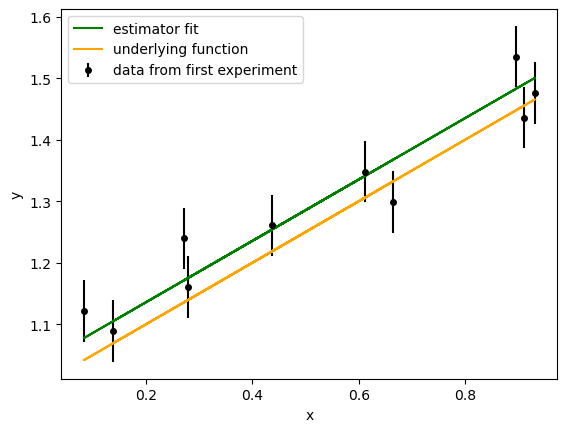

In [46]:
# example: first experiment

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.errorbar(x[0],y[0], yerr=0.05, fmt='.', color='black', markersize=8, label='data from first experiment')
plt.plot(x[0], x[0]*estima[0] + estimb[0], color='green', label='estimator fit')
plt.plot(x[0], linfunc(x[0]), color='orange', label='underlying function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

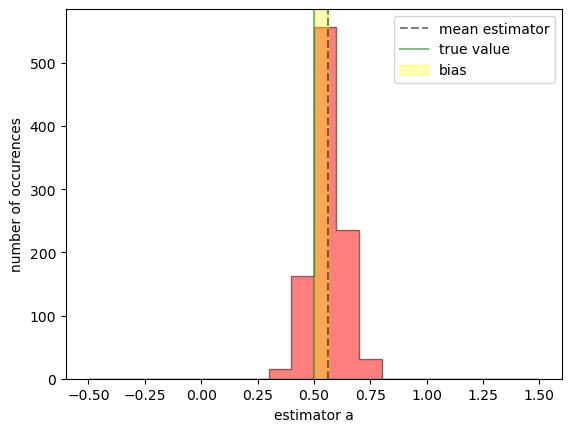

In [95]:
# illustrate a and b estimation

plt.hist(estima, histtype='stepfilled', color='red', alpha=0.5, edgecolor='black', bins=20, range=(-0.5,1.5))
plt.axvline(x=np.mean(estima), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=0.5, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmin=0.5, xmax=np.mean(estima), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator a')
plt.ylabel('number of occurences')
plt.legend()

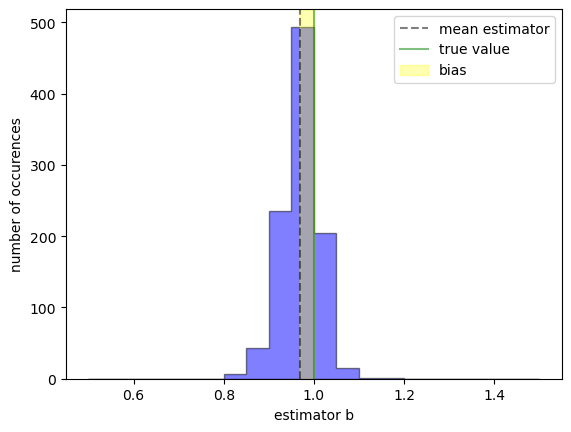

In [96]:
plt.hist(estimb, histtype='stepfilled', color='blue', alpha=0.5, edgecolor='black', bins=20, range=(0.5,1.5))
plt.axvline(x=np.mean(estimb), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=1.0, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmax=1.0, xmin=np.mean(estimb), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator b')
plt.ylabel('number of occurences')
plt.legend()

mean fitted a:  0.504894817262658
bias of fitted a:  0.004894817262657947
variance of fitted a:  0.0038267718669944767
mean fitted b:  0.9973595777257058
bias of fitted b:  -0.002640422274294174
variance of fitted b:  0.0012971971810453269


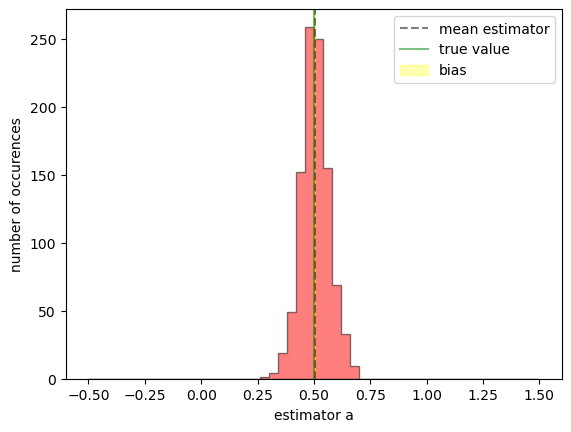

In [104]:
# alternative: numpy built-in polynomial fit

fits = np.array([np.polyfit(x[i], y[i], 1) for i in range (0,1000)])
fitted_a = np.array([fits[i][0] for i in range(0,1000)])
fitted_b = np.array([fits[i][1] for i in range(0,1000)])

print('mean fitted a: ', np.mean(fitted_a))
print('bias of fitted a: ', np.mean(fitted_a) - 0.5)
print('variance of fitted a: ', np.var(fitted_a))
print('mean fitted b: ', np.mean(fitted_b))
print('bias of fitted b: ', np.mean(fitted_b) - 1.0)
print('variance of fitted b: ', np.var(fitted_b))

# illustrate a and b estimation

plt.hist(fitted_a, histtype='stepfilled', color='red', alpha=0.5, edgecolor='black', bins=50, range=(-0.5,1.5))
plt.axvline(x=np.mean(fitted_a), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=0.5, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmin=0.5, xmax=np.mean(fitted_a), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator a')
plt.ylabel('number of occurences')
plt.legend()

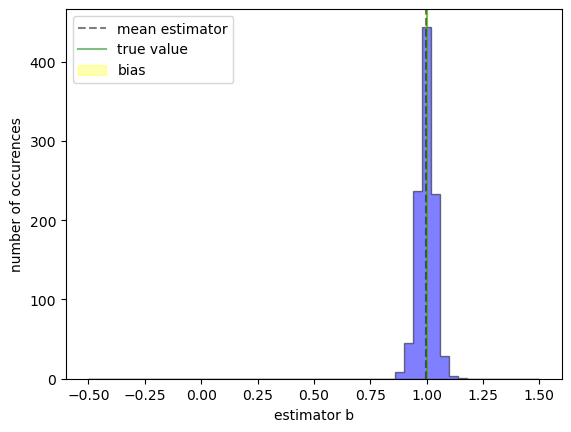

In [98]:
plt.hist(fitted_b, histtype='stepfilled', color='blue', alpha=0.5, edgecolor='black', bins=50, range=(-0.5,1.5))
plt.axvline(x=np.mean(fitted_b), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=1.0, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmax=1.0, xmin=np.mean(fitted_b), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator b')
plt.ylabel('number of occurences')
plt.legend()

What we learn: Numpy polynomial fitting is pretty good when it comes to bias!

variance of x2:  0.07799537176668932
covariance of x2 and y:  0.04219983739953133
mean of estimator a = cov(x2,y)/var(x2):  0.5440956948372732
bias of estimator a:  0.04409569483727316
variance of estimator a:  0.005493745236254397
mean of estimator b = <y> - estim_a*<x2>:  0.9780547196110165
bias of estimator b:  -0.021945280388983468
variance of estimator b:  0.0018406261465491454


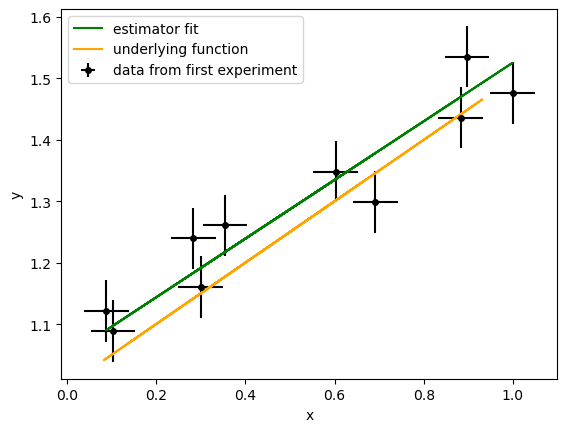

In [54]:
# now we have an uncertainty in x too...

x2 = np.array([np.random.normal(x[i], 0.05) for i in range (0,1000)])

varx2 = np.array([np.var(x2[i]) for i in range(0,1000)])
covxy2 = np.array([np.cov(x2[i], y[i])[0,1] for i in range(0,1000)])
estima2 = covxy2/varx2
estimb2 = np.array([np.mean(y[i]) - estima2[i]*np.mean(x2[i]) for i in range(0,1000)])

print('variance of x2: ', np.mean(varx2))
print('covariance of x2 and y: ', np.mean(covxy2))
print('mean of estimator a = cov(x2,y)/var(x2): ', np.mean(estima2))
print('bias of estimator a: ', np.mean(estima2) - 0.5)
print('variance of estimator a: ', np.var(estima2))
print('mean of estimator b = <y> - estim_a*<x2>: ', np.mean(estimb2))
print('bias of estimator b: ', np.mean(estimb2) - 1)
print('variance of estimator b: ', np.var(estimb2))

plt.errorbar(x2[0],y[0], xerr=0.05, yerr=0.05, fmt='.', color='black', markersize=8, label='data from first experiment')
plt.plot(x2[0], x2[0]*estima2[0] + estimb2[0], color='green', label='estimator fit')
plt.plot(x[0], linfunc(x[0]), color='orange', label='underlying function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

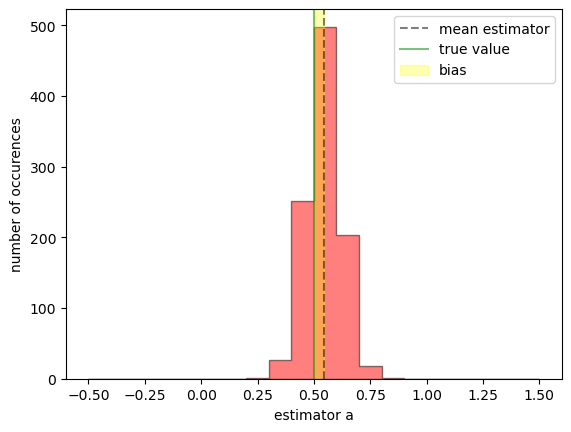

In [101]:
plt.hist(estima2, histtype='stepfilled', color='red', alpha=0.5, edgecolor='black', bins=20, range=(-0.5,1.5))
plt.axvline(x=np.mean(estima2), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=0.5, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmin=0.5, xmax=np.mean(estima2), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator a')
plt.ylabel('number of occurences')
plt.legend()

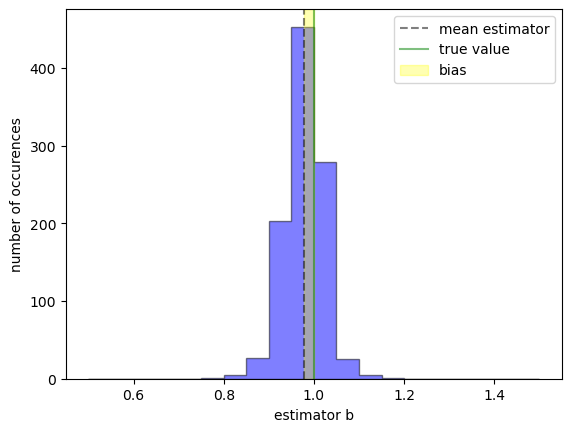

In [102]:
plt.hist(estimb2, histtype='stepfilled', color='blue', alpha=0.5, edgecolor='black', bins=20, range=(0.5,1.5))
plt.axvline(x=np.mean(estimb2), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=1.0, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmax=1.0, xmin=np.mean(estimb2), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator b')
plt.ylabel('number of occurences')
plt.legend()

variance of x3:  0.11029807136812349
covariance of x3 and y3:  0.04161827640340545
mean of estimator a = cov(x3,y3)/var(x3):  0.3822205748307067
bias of estimator a:  -0.1177794251692933
variance of estimator a:  0.06354321112489196
mean of estimator b = <y3> - estim_a3*<x3>:  1.0555526758220515
bias of estimator b:  0.05555267582205148
variance of estimator b:  0.022429086902189716


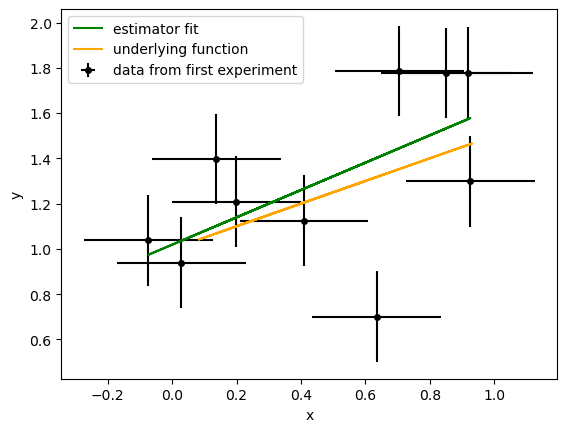

In [56]:
# modify gaussian error width for x and y

x3 = np.array([np.random.normal(x[i], 0.2) for i in range (0,1000)])
y3 = np.random.normal(linfunc(x),0.2, (1000,10))


varx3 = np.array([np.var(x3[i]) for i in range(0,1000)])
covxy3 = np.array([np.cov(x3[i], y3[i])[0,1] for i in range(0,1000)])
estima3 = covxy3/varx3
estimb3 = np.array([np.mean(y3[i]) - estima3[i]*np.mean(x3[i]) for i in range(0,1000)])

print('variance of x3: ', np.mean(varx3))
print('covariance of x3 and y3: ', np.mean(covxy3))
print('mean of estimator a = cov(x3,y3)/var(x3): ', np.mean(estima3))
print('bias of estimator a: ', np.mean(estima3) - 0.5)
print('variance of estimator a: ', np.var(estima3))
print('mean of estimator b = <y3> - estim_a3*<x3>: ', np.mean(estimb3))
print('bias of estimator b: ', np.mean(estimb3) - 1)
print('variance of estimator b: ', np.var(estimb3))

plt.errorbar(x3[0],y3[0], xerr=0.2, yerr=0.2, fmt='.', color='black', markersize=8, label='data from first experiment')
plt.plot(x3[0], x3[0]*estima3[0] + estimb3[0], color='green', label='estimator fit')
plt.plot(x[0], linfunc(x[0]), color='orange', label='underlying function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

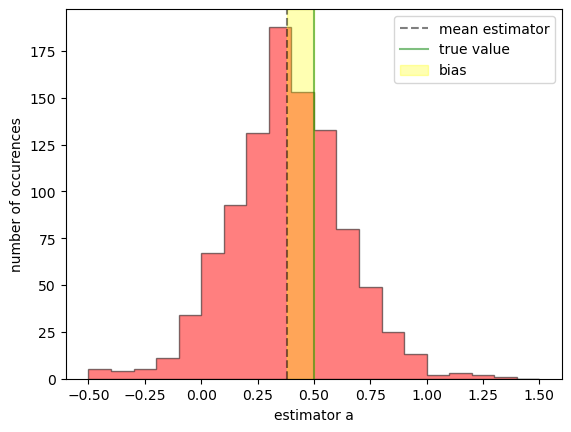

In [93]:
plt.hist(estima3, histtype='stepfilled', color='red', alpha=0.5, edgecolor='black', bins=20, range=(-0.5,1.5))
plt.axvline(x=np.mean(estima3), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=0.5, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmin=0.5, xmax=np.mean(estima3), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator a')
plt.ylabel('number of occurences')
plt.legend()

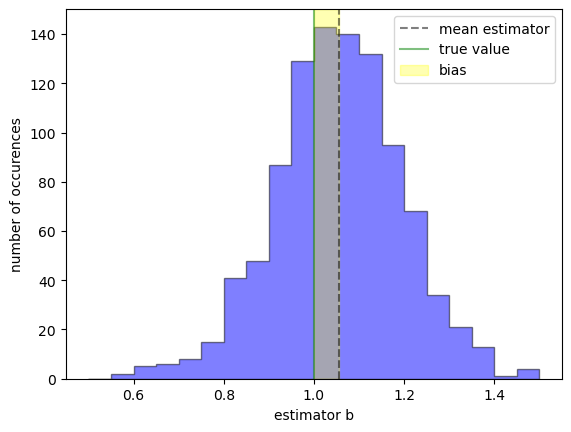

In [94]:
plt.hist(estimb3, histtype='stepfilled', color='blue', alpha=0.5, edgecolor='black', bins=20, range=(0.5,1.5))
plt.axvline(x=np.mean(estimb3), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=1.0, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmax=1.0, xmin=np.mean(estimb3), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator b')
plt.ylabel('number of occurences')
plt.legend()

variance of x4:  0.11101618075506198
covariance of x4 and y4:  0.041655801974722434
mean of estimator a = cov(x4,y4)/var(x4):  0.38471491094254573
bias of estimator a:  -0.11528508905745427
variance of estimator a:  0.061980542092955775
mean of estimator b = <y4> - estim_a4*<x4>:  1.0577276553925534
bias of estimator b:  0.05772765539255342
variance of estimator b:  0.021078296172746827


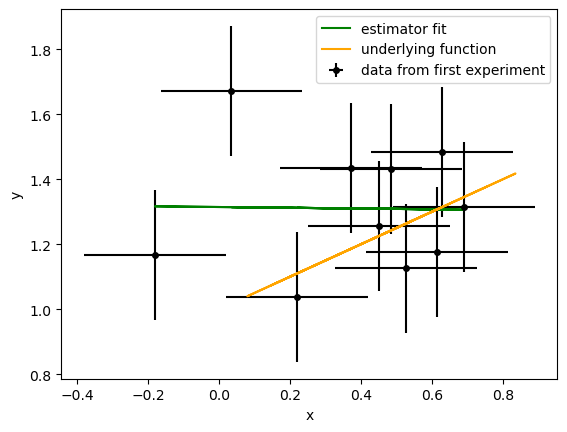

In [59]:
# increase the number of experiments

x4nosys = np.array([np.random.uniform(0, 1, 10) for i in range(0, 1000000)])
x4 = np.array([np.random.normal(x4nosys[i], 0.2) for i in range (0,1000000)])
y4 = np.random.normal(linfunc(x4nosys),0.2, (1000000,10))


varx4 = np.array([np.var(x4[i]) for i in range(0,1000000)])
covxy4 = np.array([np.cov(x4[i], y4[i])[0,1] for i in range(0,1000000)])
estima4 = covxy4/varx4
estimb4 = np.array([np.mean(y4[i]) - estima4[i]*np.mean(x4[i]) for i in range(0,1000000)])

print('variance of x4: ', np.mean(varx4))
print('covariance of x4 and y4: ', np.mean(covxy4))
print('mean of estimator a = cov(x4,y4)/var(x4): ', np.mean(estima4))
print('bias of estimator a: ', np.mean(estima4) - 0.5)
print('variance of estimator a: ', np.var(estima4))
print('mean of estimator b = <y4> - estim_a4*<x4>: ', np.mean(estimb4))
print('bias of estimator b: ', np.mean(estimb4) - 1)
print('variance of estimator b: ', np.var(estimb4))

plt.errorbar(x4[0],y4[0], xerr=0.2, yerr=0.2, fmt='.', color='black', markersize=8, label='data from first experiment')
plt.plot(x4[0], x4[0]*estima4[0] + estimb4[0], color='green', label='estimator fit')
plt.plot(x4nosys[0], linfunc(x4nosys[0]), color='orange', label='underlying function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

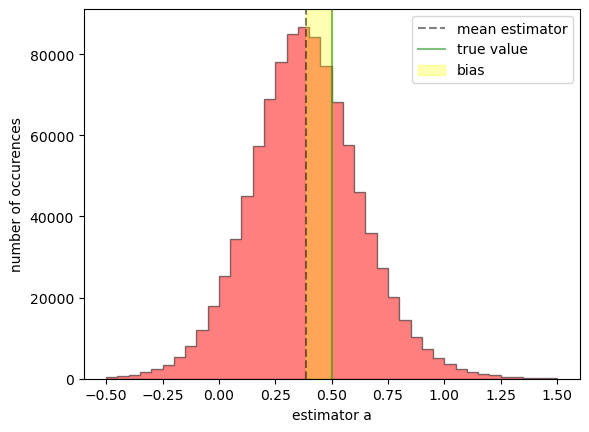

In [89]:
plt.hist(estima4, histtype='stepfilled', color='red', alpha=0.5, edgecolor='black', bins=40, range=(-0.5,1.5))
plt.axvline(x=np.mean(estima4), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=0.5, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmin=0.5, xmax=np.mean(estima4), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator a')
plt.ylabel('number of occurences')
plt.legend()

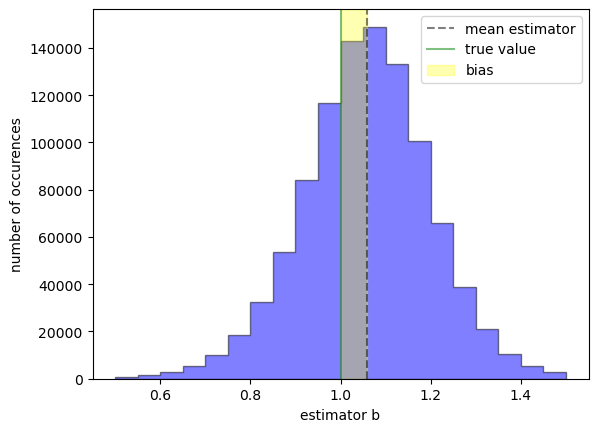

In [92]:
plt.hist(estimb4, histtype='stepfilled', color='blue', alpha=0.5, edgecolor='black', bins=20, range=(0.5,1.5))
plt.axvline(x=np.mean(estimb4), color='black', alpha=0.5, label='mean estimator', linestyle='--')
plt.axvline(x=1.0, color='green', alpha=0.5, label='true value', linestyle='solid')
plt.axvspan(xmax=1.0, xmin=np.mean(estimb4), alpha=0.3, color='yellow', label='bias')
plt.xlabel('estimator b')
plt.ylabel('number of occurences')
plt.legend()

Punchline: Systematics can introduce bias to your estimators, which can't even be healed by more statistics! It also means, that our estimator is not consistent.